# Study Experiment Design Generation

This notebook analyzes the characteristics of different space-filling experiment design generation techniques provide by raxpy for different input spaces.

In [1]:
from typing import Optional, Annotated

import raxpy
import raxpy.spaces.root as s
import raxpy.spaces.dimensions as d
import raxpy.spaces.complexity as c
import raxpy.does.lhs as lhs_doe
import raxpy.does.random as random_doe
import raxpy.does.assess as assess

In [2]:
strategies = [
    lhs_doe.generate_design,
    random_doe.generate_design,
    lhs_doe.generate_seperate_designs_by_full_subspace,
    lhs_doe.generate_design_with_projection,
]

In [3]:
def generate_designs(space:s.InputSpace,number_of_designs:int = 10, number_of_points:int = 100):
    result_map = { i : [] for i in range(len(strategies))}
    for j, strategy in enumerate(strategies):
        for i in range(number_of_designs):
            doe = strategy(space, number_of_points)

            assessment = assess.assess_with_all_metrics(doe)
            result_map[j].append((doe,assessment))

    return result_map
            

In [4]:
space = s.InputSpace(
    dimensions=[
        d.Float(id="x1", lb=0.0, ub=1.0, nullable=True),
        d.Float(id="x2", lb=0.0, ub=1.0, nullable=True),
        d.Float(id="x3", lb=0.0, ub=1.0, nullable=True),
    ]
)

By default when creating dimensions, the target portion of values in a design to be null is unspecified. Creating a design without specifying these values, results in the whole design to have parameters. The following code assigns these portitions using a complexity analysis hueristic.

In [5]:
c.assign_null_portions(s.create_level_iterable(space.children))

In [6]:
result_map = generate_designs(space)

In [7]:
result_map

{0: [(DesignOfExperiment(input_space=InputSpace(dimensions=[Float(id='x1', local_id='x1', nullable=True, specified_default=False, label=None, default_value=None, tags=None, portion_null=0.1, lb=0.0, ub=1.0, value_set=None), Float(id='x2', local_id='x2', nullable=True, specified_default=False, label=None, default_value=None, tags=None, portion_null=0.1, lb=0.0, ub=1.0, value_set=None), Float(id='x3', local_id='x3', nullable=True, specified_default=False, label=None, default_value=None, tags=None, portion_null=0.1, lb=0.0, ub=1.0, value_set=None)], multi_dim_contraints=None), input_sets=array([[0.02159315, 0.07693103, 0.77951472],
          [0.90354803, 0.67680133, 0.01424765],
          [0.74537758, 0.87876799, 0.3857672 ],
          [0.85521631, 0.27878569, 0.3077527 ],
          [0.56509317, 0.15417966, 0.54897757],
          [0.96086207, 0.56628659, 0.45692965],
          [0.32694092, 0.3776271 , 0.58894864],
          [       nan, 0.76892939, 0.51561448],
          [0.22387218,     

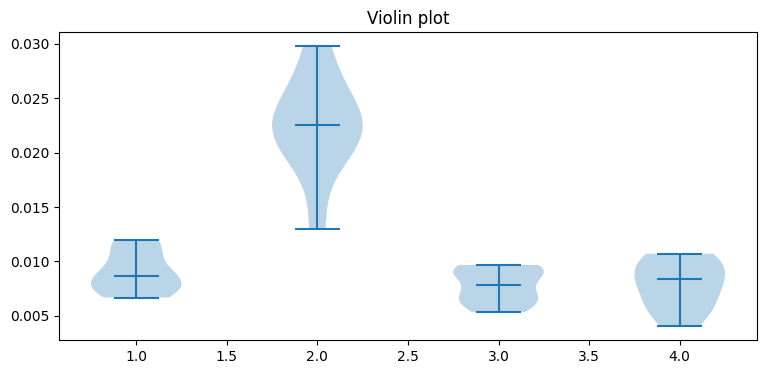

In [11]:
import matplotlib.pyplot as plt


discrepancy_data = [[t[1].measurements[assess.METRIC_WEIGHTED_DISCREPANCY] for t in result_map[i] ] for i in range(len(result_map))]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

axs.violinplot(discrepancy_data,
                  showmeans=False,
                  showmedians=True)
axs.set_title('Weighted Discrepancies')

plt.show()

In [8]:
from scipy.stats.qmc import discrepancy

In [23]:
discrepancy([[0.0],[0.5],[1.0]],method="WD")

0.05555555555555558

In [24]:
discrepancy([[0.0],[0.1],[1.0]],method="WD")

0.1266666666666667

In [25]:
discrepancy([[0.0],[0.001],[1.0]],method="WD")

0.16622266666666663

In [26]:
discrepancy([[0.0],[0.1],[0.05]],method="WD")

0.12555555555555564

In [28]:
discrepancy([[0.0],[0.1],[0.2],[0.3],[0.4],[0.5]],method="WD")

0.030555555555555447

In [29]:
discrepancy([[0.0],[0.19],[0.2],[0.3],[0.4],[0.5]],method="WD")

0.038805555555555316

In [30]:
discrepancy([[0.0],[0.19],[0.2],[0.21],[0.4],[0.5]],method="WD")

0.04395555555555508

In [31]:
discrepancy([[0.0],[0.19],[0.2],[0.21],[0.49],[0.5]],method="WD")

0.04020555555555538

In [32]:
discrepancy([[0.0],[0.01],[0.2],[0.21],[0.49],[0.5]],method="WD")

0.028205555555555817

In [20]:
help(discrepancy)

Help on function discrepancy in module scipy.stats._qmc:

discrepancy(sample: 'npt.ArrayLike', *, iterative: 'bool' = False, method: "Literal['CD', 'WD', 'MD', 'L2-star']" = 'CD', workers: 'IntNumber' = 1) -> 'float'
    Discrepancy of a given sample.
    
    Parameters
    ----------
    sample : array_like (n, d)
        The sample to compute the discrepancy from.
    iterative : bool, optional
        Must be False if not using it for updating the discrepancy.
        Default is False. Refer to the notes for more details.
    method : str, optional
        Type of discrepancy, can be ``CD``, ``WD``, ``MD`` or ``L2-star``.
        Refer to the notes for more details. Default is ``CD``.
    workers : int, optional
        Number of workers to use for parallel processing. If -1 is given all
        CPU threads are used. Default is 1.
    
    Returns
    -------
    discrepancy : float
        Discrepancy.
    
    See Also
    --------
    geometric_discrepancy
    
    Notes
    ---

In [21]:
discrepancy([[0.0],[0.19],[0.2],[0.21],[0.49],[0.5]], method="CD")

0.07532777777777722

In [22]:
discrepancy([[0.0],[0.1],[0.2],[0.3],[0.4],[0.5]], method="CD")

0.07777777777777795